In [1]:
! pip install -qU numpy==1.26.4

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ritvik1909/document-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/document-classification-dataset


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import nltk
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

In [4]:
train = pathlib.Path(os.path.join(path))

In [7]:
train

PosixPath('/kaggle/input/document-classification-dataset')

In [5]:
def get_images_labels(images, label):
  arr = []
  labels = []
  for i in images:
    img = cv2.imread(os.path.join(i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (120, 120))
    img1 = img[0:30, 0:120]/255
    img2 = img[30:90, 0:60]/255
    img3 = img[30:90, 60:120]/255
    img4 = img[90:120, 0:120]/255
    img = np.asarray([cv2.resize(img1, (48, 48)),
                      cv2.resize(img2, (48, 48)),
                      cv2.resize(img3, (48, 48)),
                      cv2.resize(img4, (48, 48))])
    img_mean = np.mean(img)
    img = img - img_mean
    img = img / np.std(img)
    arr.append(img)
    labels.append(label)
  return [arr, labels]

In [8]:
! ls {train}

email  resume  scientific_publication


In [14]:
[resume, Y_resume] = get_images_labels(list(train.glob("resume/*.*")), 0)
[email, Y_email] = get_images_labels(list(train.glob("email/*.*")), 1)
[scientific_publication, Y_scientific_publication] = get_images_labels(list(train.glob("scientific_publication/*.*")), 2)

In [15]:
images = resume + email + scientific_publication
labels = Y_resume + Y_email + Y_scientific_publication

In [16]:
images = np.asarray(images)
labels = np.asarray(labels)

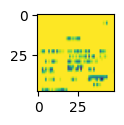

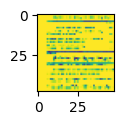

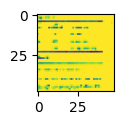

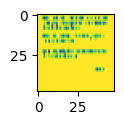

In [17]:
for i in range(4):
  plt.figure(figsize = (1, 1))
  plt.imshow(images[4][i])
  plt.grid(False)
  plt.show()

In [18]:
labels = to_categorical(labels)

In [19]:
images.shape

(165, 4, 48, 48)

In [30]:
m = tf.keras.models.Sequential()
m.add(tf.keras.layers.InputLayer(shape = (4, 48, 48, 1)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(512, 3, activation = "relu" )))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(256, 3, activation = "relu")))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
m.add(tf.keras.layers.GlobalAveragePooling1D())
m.add(tf.keras.layers.Dense(1024, activation = "sigmoid"))
m.add(tf.keras.layers.Dropout(0.2))
m.add(tf.keras.layers.Dense(3, activation = "softmax"))

In [26]:
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_14             │ (None, 4, 46, 46, 512) │         5,120 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 4, 23, 23, 512) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 4, 23, 23, 512) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 4, 21, 21, 256) │     1,179,904 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 4, 10, 10, 256) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 4, 10, 10, 256) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 4, 25600)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 25600)          │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    26,215,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │        15,375 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,415,823 (104.58 MB)

 Trainable params: 27,415,823 (104.58 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
m.compile(optimizer= "adam", loss = 'categorical_crossentropy',
              metrics = [ TruePositives(name='tp'),
                         FalsePositives(name='fp'),
                         TrueNegatives(name='tn'),
                         FalseNegatives(name='fn'),
                         "accuracy",
                         Precision(name='precision'),
                         Recall(name='recall'),
                         AUC(name='auc')])

In [28]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 16, mode = 'min', restore_best_weights = True)

In [29]:
history = m.fit(images, labels, epochs=400, batch_size= 16,
                callbacks =[earlyStopping])

Epoch 1/400


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 3), output.shape=(None, 15)